In [5]:
import sys
import pickle
import photoshop.api as ps
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os
import pandas as pd
import shutil
import torch
from IPython.display import clear_output
import umap
from random import randint

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input

from keras.applications.vgg16 import VGG16
from keras.models import Model

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [22]:
model = VGG16()
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

In [14]:
path = "C:\Austin\Projects\MS_Thesis_Data\General\Eyes\Raw_Lineart\extracted_jpgs"

In [43]:
eye_images = []
file_names = []
for img in os.listdir(path):
  file_names.append(img)
  img_arr=cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR)
  img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
  img_arr = cv2.resize(img_arr, (224,224))
  eye_images.append(np.array(img_arr))
    

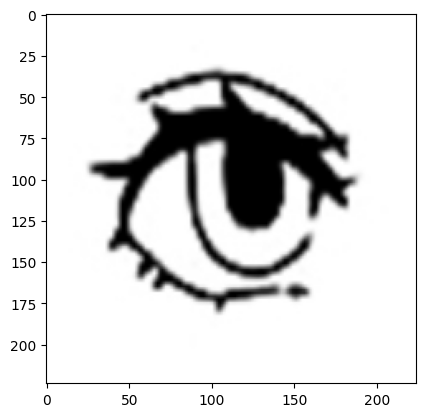

In [44]:
plt.imshow(eye_images[0])
plt.show()

In [49]:
eye_images = np.array(eye_images)
file_names = np.array(file_names)

In [51]:
print(eye_images.shape)
print(file_names.shape)


(127, 224, 224, 3)
(127,)


In [62]:
data = {"name":file_names, "image":eye_images, "features":[]}

In [ ]:
data = {}
for i in range(len(file_names)):
  name = file_names[i]
  data["name"] = name
  img = data[i]["image"]
  data[i]["image"] = img
  img = img.reshape(1,224,224,3)
  img = preprocess_input(img)
  features = model.predict(img, use_multiprocessing=True)
  data[i]["features"] = features

In [63]:
data["image"][0].shape

(224, 224, 3)

In [65]:
for i in range(len(data["name"])):
    img = data["image"][i]
    img = img.reshape(1,224,224,3)
    img = preprocess_input(img)
    features = model.predict(img)
    data["features"].append(features)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [67]:
with open('C://Austin//Projects//MS_Thesis_Data//test_eye_features_extract.pk1', 'wb') as handle:
    pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

fc63a7727c6fd9e36f964f7dcea3d04_0017_Layer 19.jpg
(224, 224, 3)
(1, 4096)


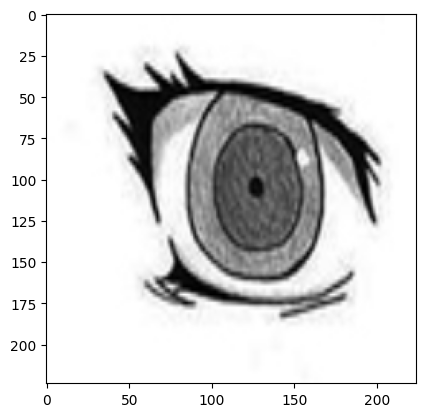

In [71]:
n = 123
print(data["name"][n])
plt.imshow(data["image"][n])
print(data["image"][n].shape)
print(data["features"][n].shape)
plt.show()

In [75]:
features = []
names = []
for i in range(len(data["features"])):
  features.append(data["features"][i])
  names.append(data["name"][i])

features = np.array(features)

In [76]:
features.shape

(127, 1, 4096)

In [77]:
features = features.reshape(-1,4096)
features.shape

(127, 4096)

In [ ]:
pca = PCA(n_components=100, random_state=22)
pca.fit(features)
x = pca.transform(features)
data["factor"]=x

In [ ]:
data["factor"].shape

(127, 100)

In [154]:
kmeans = KMeans(n_clusters=4, random_state=69)
kmeans.fit(x)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,69
,copy_x,True
,algorithm,'lloyd'


In [155]:
data["cluster"]=kmeans.labels_

In [156]:
count = {"0":0, "1":0, "2":0, "3":0} 
for id in data["cluster"]:
    count[str(id)]  = count[str(id)] + 1

count

{'0': 29, '1': 23, '2': 49, '3': 26}

In [140]:
print(data["cluster"].shape)
print(data["factor"].shape)

(127,)
(127, 100)


In [157]:
n=-1

52
2b824f2c490547e21f09c57b4f7ac697_0023_Layer 25.jpg
1
(224, 224, 3)
(1, 4096)
(100,)


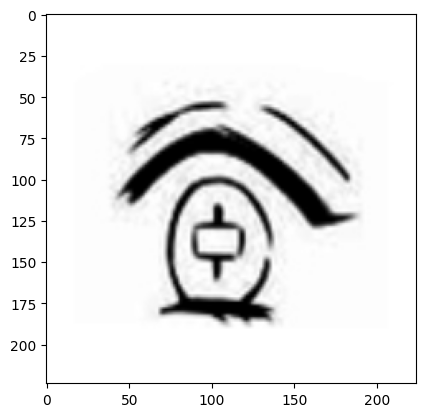

In [210]:
n=n+1
print(n)
print(data["name"][n])
print(data["cluster"][n])
print(data["image"][n].shape)
print(data["features"][n].shape)
print(data["factor"][n].shape)
plt.imshow(data["image"][n])
plt.show()